In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('superbowl-ads.csv', delimiter='^', quotechar='"')
pd.set_option('display.max_rows', raw_data.shape[0]+1)
raw_data.head(10)

,"Year,Product Type,Product/Title,Plot/Notes"
0,"1969,Car,""Chrysler """"Scuba Diver""""[4]"",""A scub..."
1,"1970,Car,""Pontiac""""Humbler"""""",""A young man pul..."
2,"1975,Security,""Master Lock""""Rifle"""""",""A man at..."
3,"1976,Copy,""Xerox""""Monks"""""",""A monk must make 5..."
4,"1979,Soft drink,""Coca-Cola""""Hey Kid, Catch!""""""..."
5,"1981,Camera,""Polaroid""""Now with a Flash"""""",""A ..."
6,"1982,Computer,""RadioShack""""Color Computer"""""",A..."
7,"1982,Restaurant,""McDonald's""""Hopscotch"""""",""Two..."
8,"1984,Computer,""Apple Inc.""""1984"""""",""In what so..."
9,"1984,Computer,""Atari""""Get Started"""""""


#### Line 561 , the Year is missing

In [3]:
raw_data.iloc[561] = '2020, ' + raw_data.iloc[561]

In [4]:
raw_data.iloc[561]

Year,Product Type,Product/Title,Plot/Notes    2020, Food, TV series,"Pringles, Rick and Mort...
Name: 561, dtype: object

#### Split the data

In [5]:
new = raw_data.iloc[:,0].str.split(',', n=3, expand=True)
new.head()

,0,1,2,3
0,1969,Car,"""Chrysler """"Scuba Diver""""[4]""","""A scuba diver in a dreamy sequence with groov..."
1,1970,Car,"""Pontiac""""Humbler""""""","""A young man pulled up in his GTO to a drive-i..."
2,1975,Security,"""Master Lock""""Rifle""""""","""A man attempts to break a Master Lock with a ..."
3,1976,Copy,"""Xerox""""Monks""""""","""A monk must make 500 handwritten scriptures f..."
4,1979,Soft drink,"""Coca-Cola""""Hey Kid","Catch!"""""",""A young kid tries to talk to """"Mea..."


In [6]:
new[3]= new[3].str.replace('"', '')
new[2] = new[2].str.strip('"')
new[1] = new[1].str.replace('"', '')
new.head()

,0,1,2,3
0,1969,Car,"Chrysler """"Scuba Diver""""[4]",A scuba diver in a dreamy sequence with groovy...
1,1970,Car,"Pontiac""""Humbler",A young man pulled up in his GTO to a drive-in...
2,1975,Security,"Master Lock""""Rifle",A man attempts to break a Master Lock with a r...
3,1976,Copy,"Xerox""""Monks",A monk must make 500 handwritten scriptures fo...
4,1979,Soft drink,"Coca-Cola""""Hey Kid","Catch!,A young kid tries to talk to Mean Joe ..."


In [7]:
new2 = new[2].str.split('""', n=1, expand=True)
new2.head()

,0,1
0,Chrysler,"Scuba Diver""""[4]"
1,Pontiac,Humbler
2,Master Lock,Rifle
3,Xerox,Monks
4,Coca-Cola,Hey Kid


In [8]:
new = pd.concat([new.iloc[:,[0,1]], new2, new.iloc[:,3]], axis=1).values
new

array([['1969', 'Car', 'Chrysler ', 'Scuba Diver""[4]',
        'A scuba diver in a dreamy sequence with groovy music introduces Chrysler as the Possible Dream.'],
       ['1970', 'Car', 'Pontiac', 'Humbler',
        'A young man pulled up in his GTO to a drive-in restaurant with dramatic music and exhaust noise in the background, pulling the exhaust knob to activate the vacuum operated exhaust, drowning the noise out, and then drive off.'],
       ['1975', 'Security', 'Master Lock', 'Rifle',
        'A man attempts to break a Master Lock with a rifle. He fails, but does put a bullet hole in the lock.'],
       ...,
       ['2020', 'Food', 'Pop-Tarts Pretzel ',
        '"Pop-Tarts Fixed the Pretzel""" "Jonathan Van Ness serves as spokesperson for Pop-Tarts Pretzel',
        ' promoting it as an alternative to boring pretzels[231]'],
       ['2020', ' Food', ' TV series', None,
        'Pringles, Rick and Morty,,After Morty enthusiastically enters the living room to promote various Prin

#### Build the final dataframe

In [9]:
data = pd.DataFrame(new, columns=['Year', 'Type', 'Company', 'Title', 'Plot'])
data = data.loc[data['Type'] != 'Product Type']
del raw_data, new, new2
data.head(10)

,Year,Type,Company,Title,Plot
0,1969,Car,Chrysler,"Scuba Diver""""[4]",A scuba diver in a dreamy sequence with groovy...
1,1970,Car,Pontiac,Humbler,A young man pulled up in his GTO to a drive-in...
2,1975,Security,Master Lock,Rifle,A man attempts to break a Master Lock with a r...
3,1976,Copy,Xerox,Monks,A monk must make 500 handwritten scriptures fo...
4,1979,Soft drink,Coca-Cola,Hey Kid,"Catch!,A young kid tries to talk to Mean Joe ..."
5,1981,Camera,Polaroid,Now with a Flash,A couple walks in a park. The man shows that n...
6,1982,Computer,RadioShack,Color Computer,A commercial for the TRS-80 computer.
7,1982,Restaurant,McDonald's,Hopscotch,Two kids are playing hopscotch while singing t...
8,1984,Computer,Apple Inc.,1984,In what some call the greatest Super Bowl comm...
9,1984,Computer,Atari,Get Started,None


In [10]:
data

,Year,Type,Company,Title,Plot
0,1969,Car,Chrysler,"Scuba Diver""""[4]",A scuba diver in a dreamy sequence with groovy...
1,1970,Car,Pontiac,Humbler,A young man pulled up in his GTO to a drive-in...
2,1975,Security,Master Lock,Rifle,A man attempts to break a Master Lock with a r...
3,1976,Copy,Xerox,Monks,A monk must make 500 handwritten scriptures fo...
4,1979,Soft drink,Coca-Cola,Hey Kid,"Catch!,A young kid tries to talk to Mean Joe ..."
5,1981,Camera,Polaroid,Now with a Flash,A couple walks in a park. The man shows that n...
6,1982,Computer,RadioShack,Color Computer,A commercial for the TRS-80 computer.
7,1982,Restaurant,McDonald's,Hopscotch,Two kids are playing hopscotch while singing t...
8,1984,Computer,Apple Inc.,1984,In what some call the greatest Super Bowl comm...
9,1984,Computer,Atari,Get Started,None


In [11]:

dictOfTypes = {'Car': 'Car',
 'Security': 'Security',
 'Copy': 'Copy',
 'Soft drink': 'Beverage',
 'Camera': 'Technology',
 'Computer': 'Technology',
 'Restaurant': 'Food',
 'Beer': 'Beverage',
 'Food': 'Food',
 'Credit card': 'Bank Insurance',
 'Soft Drink': 'Beverage',
 'Footwear': 'Clothing',
 'Clothing': 'Clothing',
 'Film': 'Film',
 'Mail': 'Technology',
 'Shoes': 'Clothing',
 'Sports': 'Sports',
 'Tire': 'Car',
 'Website': 'Technology',
 'Candy': 'Food',
 'TV': 'TV',
 'Gaming': 'Video games',
 'Potato chips': 'Food',
 'PSA': 'PSA',
 'Technology': 'Technology',
 'Manufacturing': 'Car',
 'Mobile phone': 'Phone',
 'TV show': 'TV',
 'Video Game': 'Video games',
 'Store': 'Store',
 'Truck': 'Truck',
 'Product type': 'Product type',
 'Car accessories': 'Car',
 'Adhesives': 'Adhesives',
 'Antifungal medication': 'Care',
 'Feminine care products': 'Care',
 'Insurance': 'Bank Insurance',
 'Lingerie': 'Clothing',
 'Phone': 'Phone',
 'Phone accessory': 'Phone',
 'Service': 'Service',
 'Skincare products': 'Care',
 'Software': 'Technology',
 'Game': 'Video games',
 'Toothpaste': 'Care',
 'Building materials': 'Building materials',
 'Cleaner': 'Cleaner',
 'Tax preparation': 'Bank Insurance',
 'TV series': 'TV',
 'Video games': 'Video games',
 'Web hosting': 'Technology',
 'Wireless': 'Technology',
 'Airlines': 'Travel',
 'Car / Film': 'Car',
 'Drink': 'Beverage',
 'Food / Drink': 'Food',
 'Headphones': 'Phone',
 'Investments': 'Bank Insurance',
 'Laundry detergent': 'Cleaner',
 'Loans': 'Bank Insurance',
 'Retail': 'Retail',
 'TV special': 'TV',
 'Travel': 'Travel',
 'Video game': 'Video games',
 'Alcohol': 'Beverage',
 'Alcohol / TV series': 'Beverage',
 'Beverage': 'Beverage',
 'Smart speaker': 'Phone',
 'NFL': 'NFL',
 'Video gaming': 'Video games'}

In [12]:
data['Type'] = data['Type'].map(dictOfTypes)
data.head(10)

,Year,Type,Company,Title,Plot
0,1969,Car,Chrysler,"Scuba Diver""""[4]",A scuba diver in a dreamy sequence with groovy...
1,1970,Car,Pontiac,Humbler,A young man pulled up in his GTO to a drive-in...
2,1975,Security,Master Lock,Rifle,A man attempts to break a Master Lock with a r...
3,1976,Copy,Xerox,Monks,A monk must make 500 handwritten scriptures fo...
4,1979,Beverage,Coca-Cola,Hey Kid,"Catch!,A young kid tries to talk to Mean Joe ..."
5,1981,Technology,Polaroid,Now with a Flash,A couple walks in a park. The man shows that n...
6,1982,Technology,RadioShack,Color Computer,A commercial for the TRS-80 computer.
7,1982,Food,McDonald's,Hopscotch,Two kids are playing hopscotch while singing t...
8,1984,Technology,Apple Inc.,1984,In what some call the greatest Super Bowl comm...
9,1984,Technology,Atari,Get Started,None


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 563 entries, 0 to 562
Data columns (total 5 columns):
Year       563 non-null object
Type       562 non-null object
Company    563 non-null object
Title      371 non-null object
Plot       553 non-null object
dtypes: object(5)
memory usage: 26.4+ KB


In [14]:
data

,Year,Type,Company,Title,Plot
0,1969,Car,Chrysler,"Scuba Diver""""[4]",A scuba diver in a dreamy sequence with groovy...
1,1970,Car,Pontiac,Humbler,A young man pulled up in his GTO to a drive-in...
2,1975,Security,Master Lock,Rifle,A man attempts to break a Master Lock with a r...
3,1976,Copy,Xerox,Monks,A monk must make 500 handwritten scriptures fo...
4,1979,Beverage,Coca-Cola,Hey Kid,"Catch!,A young kid tries to talk to Mean Joe ..."
5,1981,Technology,Polaroid,Now with a Flash,A couple walks in a park. The man shows that n...
6,1982,Technology,RadioShack,Color Computer,A commercial for the TRS-80 computer.
7,1982,Food,McDonald's,Hopscotch,Two kids are playing hopscotch while singing t...
8,1984,Technology,Apple Inc.,1984,In what some call the greatest Super Bowl comm...
9,1984,Technology,Atari,Get Started,None


In [15]:
data['Type'].isnull()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [16]:
data.loc[561, 'Type'] = 'Food'
data.iloc[561]

Year                                                    2020
Type                                                    Food
Company                                            TV series
Title                                                   None
Plot       Pringles, Rick and Morty,,After Morty enthusia...
Name: 561, dtype: object

#### Count type of ads by year

In [17]:
data_counts = pd.crosstab(data['Type'], data['Year'])
data_counts.head(5)

Year,1969,1970,1975,1976,1979,1981,1982,1984,1988,1989,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Type,,,,,,,,,,,,,,,,,,,,,
Adhesives,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Bank Insurance,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,0,1,5,0,0
Beverage,0,0,0,0,1,0,0,1,0,1,...,2,4,0,2,3,2,3,9,10,1
Building materials,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Car,1,1,0,0,0,0,0,0,0,0,...,7,4,1,4,12,5,7,12,6,8


#### # of ads by year

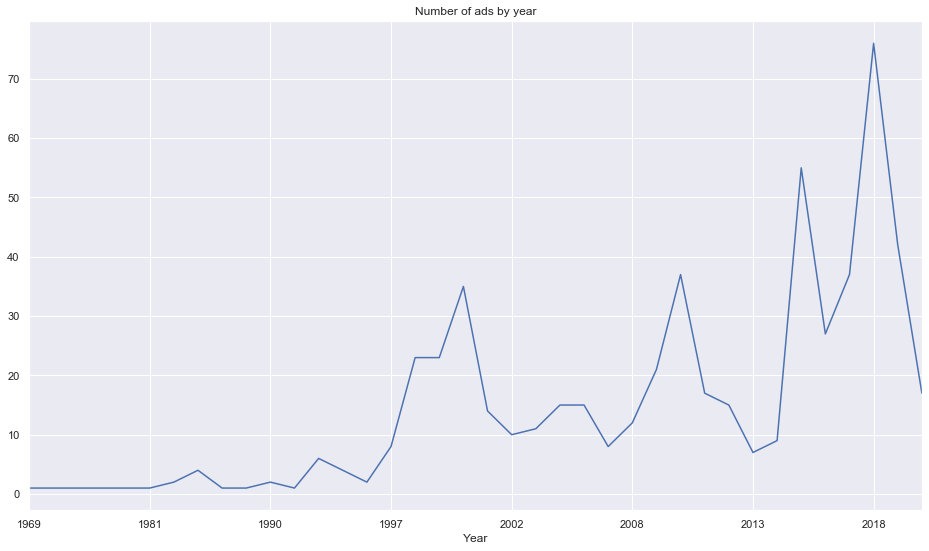

In [18]:
ads_by_year = data_counts.sum(axis=0)
ads_by_year.plot(figsize=(16,9), title="Number of ads by year")
plt.show()

#### Most frequent type > 10

In [19]:
data_counts['Total'] = data_counts.sum(axis=1)
data_counts['Total']

Type
Adhesives               1
Bank Insurance         17
Beverage               90
Building materials      1
Car                    88
Care                    4
Cleaner                 7
Clothing               10
Copy                    1
Film                  140
Food                   58
NFL                     1
PSA                     1
Phone                   9
Product type            5
Retail                  1
Security                2
Service                 2
Sports                  8
Store                   4
TV                     23
Technology             76
Travel                  3
Truck                   1
Video games            10
Name: Total, dtype: int64

In [20]:
data_counts.sort_values(by='Total', ascending=False, inplace=True)
data_counts

Year,1969,1970,1975,1976,1979,1981,1982,1984,1988,1989,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total
Type,,,,,,,,,,,,,,,,,,,,,
Film,0,0,0,0,0,0,0,0,0,0,...,5,4,0,10,9,6,6,8,3,140
Beverage,0,0,0,0,1,0,0,1,0,1,...,4,0,2,3,2,3,9,10,1,90
Car,1,1,0,0,0,0,0,0,0,0,...,4,1,4,12,5,7,12,6,8,88
Technology,0,0,0,0,0,1,1,2,0,0,...,0,0,0,5,0,9,8,4,1,76
Food,0,0,0,0,0,0,1,0,1,0,...,1,1,1,6,4,1,7,5,4,58
TV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,6,10,4,0,23
Bank Insurance,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5,0,1,5,0,0,17
Video games,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,1,1,1,1,0,10
Clothing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,1,0,1,0,0,10


In [21]:
top = data_counts.loc[data_counts['Total']>10].drop('Total', 1)
top

Year,1969,1970,1975,1976,1979,1981,1982,1984,1988,1989,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Type,,,,,,,,,,,,,,,,,,,,,
Film,0,0,0,0,0,0,0,0,0,0,...,5,5,4,0,10,9,6,6,8,3
Beverage,0,0,0,0,1,0,0,1,0,1,...,2,4,0,2,3,2,3,9,10,1
Car,1,1,0,0,0,0,0,0,0,0,...,7,4,1,4,12,5,7,12,6,8
Technology,0,0,0,0,0,1,1,2,0,0,...,0,0,0,0,5,0,9,8,4,1
Food,0,0,0,0,0,0,1,0,1,0,...,2,1,1,1,6,4,1,7,5,4
TV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,6,10,4,0
Bank Insurance,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,0,1,5,0,0


In [22]:
filter = list(top.index)

In [23]:
print(50*'#' + '\n# Most Frequent Type (desending order)\n' + 50*'#')
filter

##################################################
# Most Frequent Type (desending order)
##################################################


['Film', 'Beverage', 'Car', 'Technology', 'Food', 'TV', 'Bank Insurance']

#### Evolution over year of the overall most frequent type
##### What we can see :

##### - The categories Film / Food / Beer are a constant over time
##### - There is a peak for advertisements regarding websites in 2000
##### - TV series and Wireless appeared since 2016

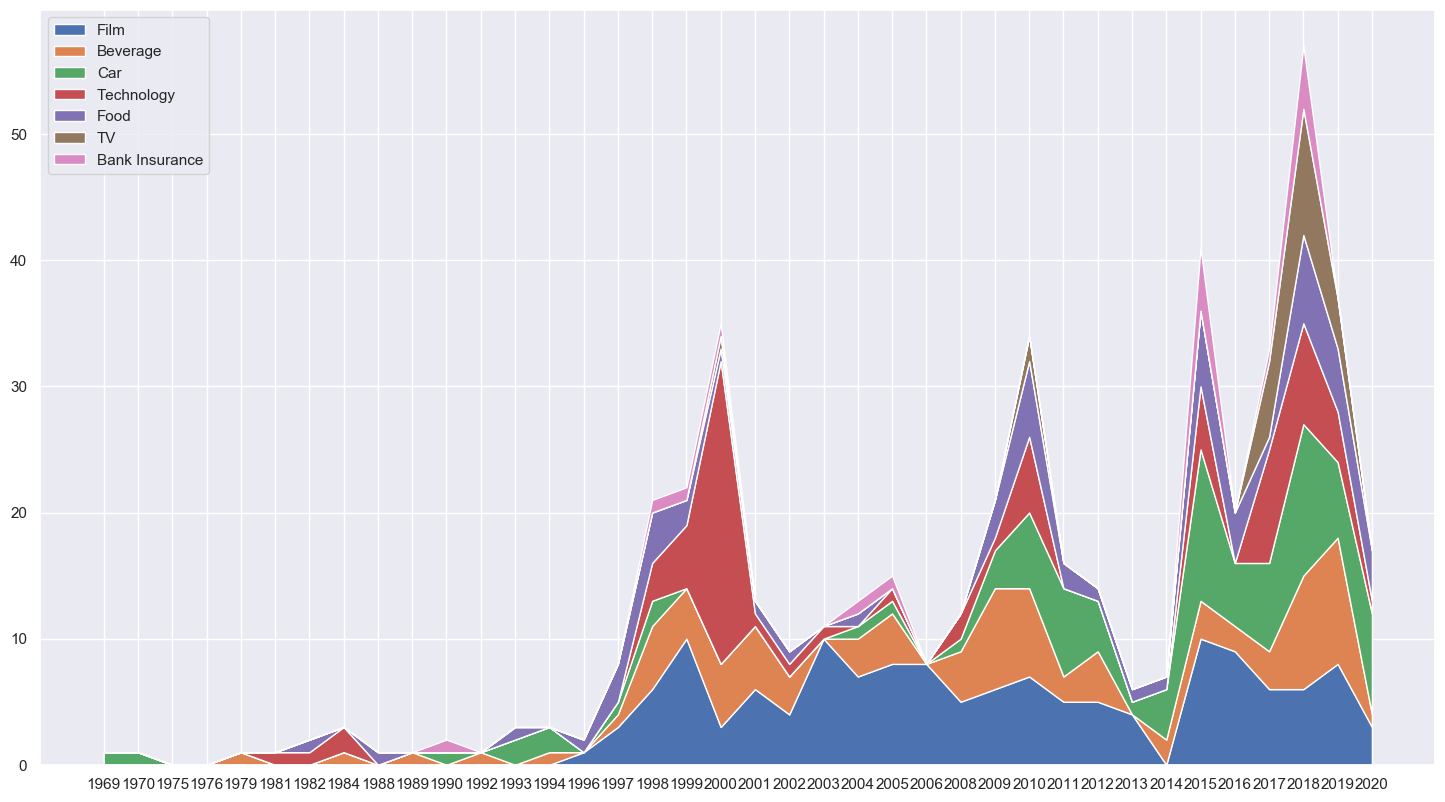

In [24]:
labels = filter
fig, ax = plt.subplots(figsize=(18,10), dpi=100)
ax.stackplot(top.columns, top.values, labels=labels)
ax.legend(loc='upper left')
plt.show()

In [25]:
data['Count'] = data['Type']
data_group = data.groupby(['Year', 'Type'], as_index=False)['Count'].count()
data_group

,Year,Type,Count
0,1969,Car,1
1,1970,Car,1
2,1975,Security,1
3,1976,Copy,1
4,1979,Beverage,1
5,1981,Technology,1
6,1982,Food,1
7,1982,Technology,1
8,1984,Beverage,1
9,1984,Security,1


In [26]:
plot_data = data_group[data_group.Type.isin(['Film', 'Beverage', 'Car', 'Technology', 'Food', 'TV', 'Bank Insurance'])]

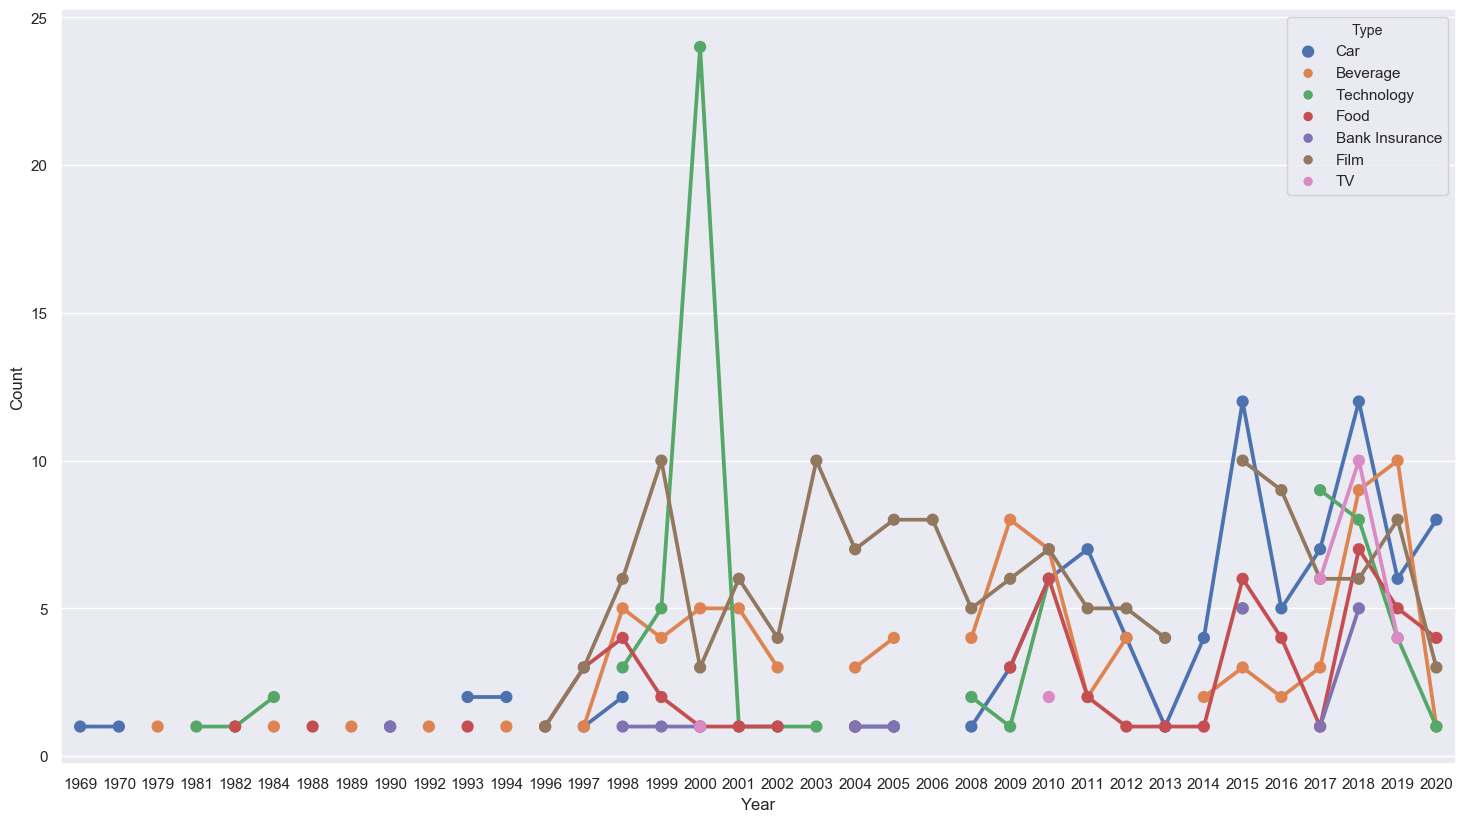

In [27]:
fig, ax = plt.subplots(figsize=(18,10), dpi=100)
ax = sns.pointplot(x='Year', y='Count', hue='Type', data=plot_data)
plt.show()

#### Top 10 year by year

In [28]:
col = data_counts.columns
result = []
for i in range(0, col.shape[0]):
    list_raw =list(data_counts.loc[data_counts[col[i]]>0, col[i]].sort_values(ascending=False)[:10].index)
    for j in range(len(list_raw), 10):
        list_raw.append('-')
    result.append(list_raw)
result = np.vstack(result).transpose()
result = pd.DataFrame(data=result, columns=col)
result.iloc[:,:18].head(10)

Year,1969,1970,1975,1976,1979,1981,1982,1984,1988,1989,1990,1992,1993,1994,1996,1997,1998,1999
0,Car,Car,Security,Copy,Beverage,Technology,Food,Technology,Food,Beverage,Bank Insurance,Beverage,Clothing,Car,Food,Food,Film,Film
1,-,-,-,-,-,-,Technology,Security,-,-,Car,-,Car,Clothing,Film,Film,Beverage,Technology
2,-,-,-,-,-,-,-,Beverage,-,-,-,-,Food,Beverage,-,Car,Food,Beverage
3,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,Beverage,Technology,Food
4,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,Car,Sports
5,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,Sports,Bank Insurance
6,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,Clothing,-
7,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,Bank Insurance,-
8,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
9,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-


In [29]:
result.iloc[:,18:].head(10)

Year,2000,2001,2002,2003,2004,2005,2006,2008,2009,2010,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total
0,Technology,Film,Film,Film,Film,Film,Film,Film,Beverage,Beverage,...,Film,Film,Car,Car,Film,Technology,Car,Beverage,Car,Film
1,Beverage,Beverage,Beverage,Technology,Beverage,Beverage,-,Beverage,Film,Film,...,Car,Truck,Beverage,Film,Car,Car,TV,Film,Food,Beverage
2,Film,Video games,Video games,-,PSA,Bank Insurance,-,Technology,Food,Food,...,Beverage,Food,Store,Food,Food,TV,Beverage,Car,Film,Car
3,Bank Insurance,Food,Food,-,Video games,Technology,-,Car,Car,Technology,...,Store,Car,Product type,Bank Insurance,Phone,Film,Technology,Food,Technology,Technology
4,TV,Technology,Technology,-,Bank Insurance,Car,-,-,Technology,Car,...,Food,-,Food,Technology,Beverage,Beverage,Food,TV,Beverage,Food
5,Food,-,-,-,Food,-,-,-,-,TV,...,-,-,-,Phone,Care,Building materials,Cleaner,Technology,-,TV
6,-,-,-,-,Car,-,-,-,-,Phone,...,-,-,-,Care,Product type,Product type,Film,NFL,-,Bank Insurance
7,-,-,-,-,-,-,-,-,-,Clothing,...,-,-,-,Beverage,Sports,Cleaner,Sports,Store,-,Video games
8,-,-,-,-,-,-,-,-,-,Video games,...,-,-,-,Service,Clothing,Video games,Bank Insurance,Product type,-,Clothing
9,-,-,-,-,-,-,-,-,-,-,...,-,-,-,Clothing,Video games,Bank Insurance,Travel,Phone,-,Phone


#### Clustering Types

In [30]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, set_link_color_palette
from matplotlib.colors import rgb2hex, colorConverter

In [31]:
data_counts.head()

Year,1969,1970,1975,1976,1979,1981,1982,1984,1988,1989,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total
Type,,,,,,,,,,,,,,,,,,,,,
Film,0,0,0,0,0,0,0,0,0,0,...,5,4,0,10,9,6,6,8,3,140
Beverage,0,0,0,0,1,0,0,1,0,1,...,4,0,2,3,2,3,9,10,1,90
Car,1,1,0,0,0,0,0,0,0,0,...,4,1,4,12,5,7,12,6,8,88
Technology,0,0,0,0,0,1,1,2,0,0,...,0,0,0,5,0,9,8,4,1,76
Food,0,0,0,0,0,0,1,0,1,0,...,1,1,1,6,4,1,7,5,4,58


In [32]:
cluster_data = data_counts.transpose()
cluster_data

Type,Film,Beverage,Car,Technology,Food,TV,Bank Insurance,Video games,Clothing,Phone,...,Travel,Security,Service,Truck,Adhesives,Retail,NFL,Copy,Building materials,PSA
Year,,,,,,,,,,,,,,,,,,,,,
1969,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1970,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1975,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1976,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1979,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1981,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1982,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1984,0,1,0,2,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1988,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# computing the distance between clusters
c_dist= pdist(cluster_data)
c_dist

array([  0.        ,   1.41421356,   1.41421356,   1.41421356,
         1.41421356,   1.73205081,   2.64575131,   1.41421356,
         1.41421356,   1.        ,   1.41421356,   3.31662479,
         1.73205081,   1.73205081,   4.35889894,   9.48683298,
        12.16552506,  24.77902339,   8.06225775,   5.38516481,
        10.09950494,   7.87400787,   9.05538514,   8.06225775,
         6.70820393,  10.67707825,  14.2126704 ,   8.36660027,
         7.21110255,   4.24264069,   4.        ,  18.81488772,
        11.22497216,  14.28285686,  23.47338919,  15.84297952,
         8.71779789, 213.78026102,   1.41421356,   1.41421356,
         1.41421356,   1.41421356,   1.73205081,   2.64575131,
         1.41421356,   1.41421356,   1.        ,   1.41421356,
         3.31662479,   1.73205081,   1.73205081,   4.35889894,
         9.48683298,  12.16552506,  24.77902339,   8.06225775,
         5.38516481,  10.09950494,   7.87400787,   9.05538514,
         8.06225775,   6.70820393,  10.67707825,  14.21

In [34]:
# computing the linkage
c_link = linkage(cluster_data, metric='correlation', method='complete')
c_link

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [4.00000000e+00, 9.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [1.10000000e+01, 4.00000000e+01, 0.00000000e+00, 3.00000000e+00],
       [2.10000000e+01, 2.40000000e+01, 4.99549189e-03, 2.00000000e+00],
       [1.90000000e+01, 2.00000000e+01, 8.52398347e-03, 2.00000000e+00],
       [5.00000000e+00, 1.80000000e+01, 2.87449931e-02, 2.00000000e+00],
       [2.20000000e+01, 2.30000000e+01, 3.50227043e-02, 2.00000000e+00],
       [2.70000000e+01, 3.80000000e+01, 4.72274431e-02, 2.00000000e+00],
       [1.40000000e+01, 1.50000000e+01, 5.38006663e-02, 2.00000000e+00],
       [2.50000000e+01, 4.30000000e+01, 6.03886708e-02, 3.00000000e+00],
       [2.60000000e+01, 3.60000000e+01, 6.87692758e-02, 2.00000000e+00],
       [2.80000000e+01, 3.70000000e+01, 7.82367875e-02, 2.00000000e+00],
       [1.60000000e+01, 4.60000000e+01, 8.12285795e-02, 3.00000000e+00],
       [3.00000000e+01, 4.20000000e+01, 8.79268524e

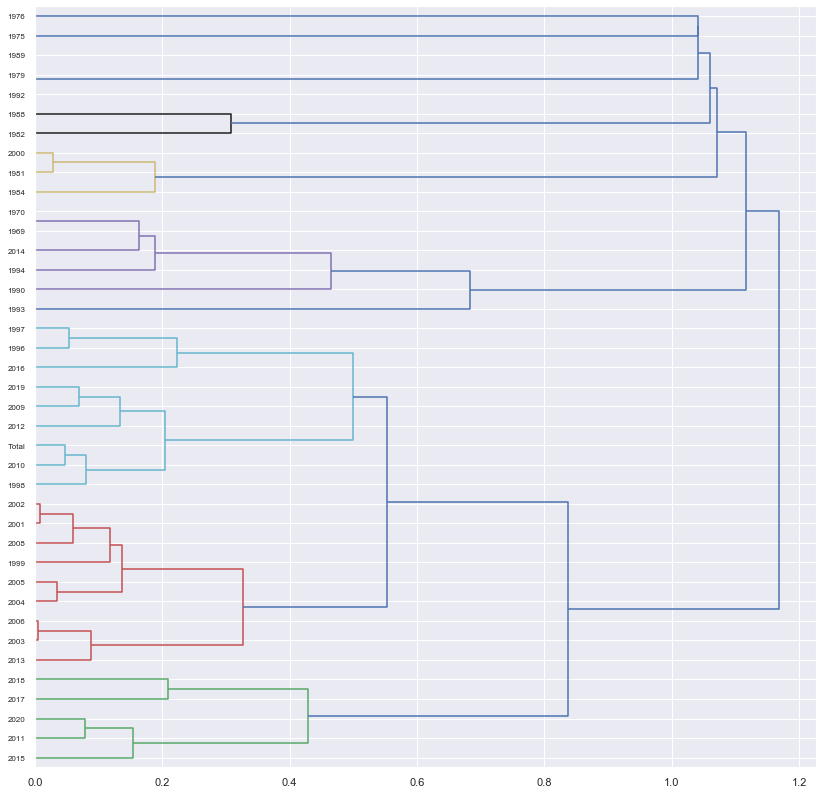

In [36]:
fig, axes = plt.subplots(1, 1, figsize=(14,14))
dendro = dendrogram(c_link, labels=list(data_counts.columns), orientation='right', ax=axes, color_threshold=0.5)
plt.show()